In [49]:
!pip install pyspark

In [1]:
# Data manipulation and Graphing
import numpy as np # Linear algebra
import pandas as pd #data processing, CSV file I/O
import os # Interact with OS file system
import seaborn as sns # Making graphs and visualising data

# Basic Setup
from pyspark import SparkConf, SparkContext #
from pyspark.sql import SparkSession, SQLContext # Working with DataFrames

# Spark Tools
from pyspark.sql.types import * # Schema tools for DataFrames
import pyspark.sql.functions as F # 
from pyspark.sql.functions import udf, col

from pyspark.ml.regression import LinearRegression # Linear regression model
from pyspark.mllib.evaluation import RegressionMetrics # Model evaluation metrics

from pyspark.ml.tuning import ParamGridBuilder, CrossValidator, CrossValidatorModel # Hyperparameter tuning
from pyspark.ml.feature import VectorAssembler, StandardScaler # Prepare features for machine learning
from pyspark.ml.evaluation import RegressionEvaluator # Evaluation

In [3]:
import os
# Find data set in file system
for dirname, _, filenames in os.walk(r'C:\Users\washi\OneDrive\Desktop\MIS PROYECTOS\archivos'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\washi\OneDrive\Desktop\MIS PROYECTOS\archivos\housing.csv


In [5]:
from pyspark.sql import SparkSession

In [7]:
# Create a spark session
spark = SparkSession.builder.appName('Dataframe').getOrCreate()

In [9]:
# Read over dataset
df_housing = spark.read.option('header', 'true').csv(os.path.join(dirname, 'housing.csv'), inferSchema = True)

In [11]:
# Show the first 3 rows
df_housing.head(3)

[Row(longitude=-122.23, latitude=37.88, housing_median_age=41.0, total_rooms=880.0, total_bedrooms=129.0, population=322.0, households=126.0, median_income=8.3252, median_house_value=452600.0, ocean_proximity='NEAR BAY'),
 Row(longitude=-122.22, latitude=37.86, housing_median_age=21.0, total_rooms=7099.0, total_bedrooms=1106.0, population=2401.0, households=1138.0, median_income=8.3014, median_house_value=358500.0, ocean_proximity='NEAR BAY'),
 Row(longitude=-122.24, latitude=37.85, housing_median_age=52.0, total_rooms=1467.0, total_bedrooms=190.0, population=496.0, households=177.0, median_income=7.2574, median_house_value=352100.0, ocean_proximity='NEAR BAY')]

In [13]:
# Checking schema
df_housing.printSchema()

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)
 |-- total_bedrooms: double (nullable = true)
 |-- population: double (nullable = true)
 |-- households: double (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)
 |-- ocean_proximity: string (nullable = true)



In [15]:
# Print column names
df_housing.columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [33]:
# Checking data entries for each column
df_housing.select(['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms']).describe().show()

+-------+-------------------+-----------------+------------------+------------------+------------------+
|summary|          longitude|         latitude|housing_median_age|       total_rooms|    total_bedrooms|
+-------+-------------------+-----------------+------------------+------------------+------------------+
|  count|              20640|            20640|             20640|             20640|             20433|
|   mean|-119.56970445736148| 35.6318614341087|28.639486434108527|2635.7630813953488| 537.8705525375618|
| stddev|  2.003531723502584|2.135952397457101| 12.58555761211163|2181.6152515827944|421.38507007403115|
|    min|            -124.35|            32.54|               1.0|               2.0|               1.0|
|    max|            -114.31|            41.95|              52.0|           39320.0|            6445.0|
+-------+-------------------+-----------------+------------------+------------------+------------------+



In [37]:
df_housing.select(['population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']).describe().show()

+-------+------------------+-----------------+------------------+------------------+---------------+
|summary|        population|       households|     median_income|median_house_value|ocean_proximity|
+-------+------------------+-----------------+------------------+------------------+---------------+
|  count|             20640|            20640|             20640|             20640|          20640|
|   mean|1425.4767441860465|499.5396802325581|3.8706710029070246|206855.81690891474|           NULL|
| stddev|  1132.46212176534|382.3297528316098| 1.899821717945263|115395.61587441359|           NULL|
|    min|               3.0|              1.0|            0.4999|           14999.0|      <1H OCEAN|
|    max|           35682.0|           6082.0|           15.0001|          500001.0|     NEAR OCEAN|
+-------+------------------+-----------------+------------------+------------------+---------------+



In [63]:
# Columns overview
pd.DataFrame(df_housing.dtypes, columns = ['Column Name', 'Data type'])

,Column Name,Data type
0,longitude,double
1,latitude,double
2,housing_median_age,double
3,total_rooms,double
4,total_bedrooms,double
5,population,double
6,households,double
7,median_income,double
8,price,double
9,ocean_proximity,string


In [47]:
df_housing.select(['longitude']).show()

+---------+
|longitude|
+---------+
|  -122.23|
|  -122.22|
|  -122.24|
|  -122.25|
|  -122.25|
|  -122.25|
|  -122.25|
|  -122.25|
|  -122.26|
|  -122.25|
|  -122.26|
|  -122.26|
|  -122.26|
|  -122.26|
|  -122.26|
|  -122.26|
|  -122.27|
|  -122.27|
|  -122.26|
|  -122.27|
+---------+
only showing top 20 rows



In [57]:
# Check for missing values
for column in df_housing.columns:
    print(column, df_housing.filter(col(column).cast("float").isin([None, np.nan])).count())

longitude 0
latitude 0
housing_median_age 0
total_rooms 0
total_bedrooms 0
population 0
households 0
median_income 0
median_house_value 0
ocean_proximity 0


In [59]:
df_housing = df_housing.withColumnRenamed('median_house_value', 'price')

In [61]:
# Data imputation
df_housing.na.drop()

DataFrame[longitude: double, latitude: double, housing_median_age: double, total_rooms: double, total_bedrooms: double, population: double, households: double, median_income: double, price: double, ocean_proximity: string]

In [65]:
type(df_housing['price'])

pyspark.sql.column.Column

C:\Users\washi\AppData\Local\Temp\ipykernel_32256\1177894381.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_housing.select('price').toPandas(), color="skyblue")


+------------------+------------------+
|   skewness(price)|   kurtosis(price)|
+------------------+------------------+
|0.9776922140978437|0.3275001388119674|
+------------------+------------------+



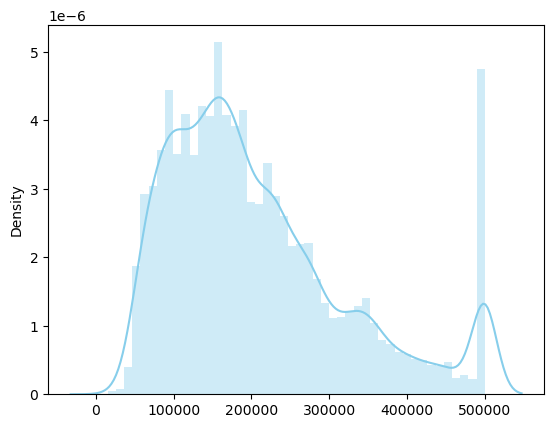

In [67]:
# Check if prices are distributed normally
sns.distplot(df_housing.select('price').toPandas(), color="skyblue")
df_housing.select(F.skewness('price'), F.kurtosis('price')).show()